# Exploratory Data Analysis

## 1. Load and Inspect Dataset
- Load the dataset from TensorFlow keras API.
- Display basic information about the dataset.


In [5]:
import sys
import os

# Add the parent directory to the system path
sys.path.append(os.path.abspath(os.path.join('..')))

# data download, save and read
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from src.utils import dataset_utils as du
from src.utils import visualization_utils as vu

# prevent TensorFlow from allocating all the GPU memory at the start
physical_devices = tf.config.list_physical_devices('GPU')
if physical_devices:
    for gpu in physical_devices:
        tf.config.experimental.set_memory_growth(gpu, True)

# download data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# save data in the localhost
base_path = "/nfsl/tensorflow/mnist-keras-ann-classifier/notebooks"
du.save_dataset((x_train, y_train, x_test, y_test), base_path, format='pickle')

# load the data saved locally
x_train_loaded, y_train_loaded, x_test_loaded, y_test_loaded = du.load_dataset(base_path, format='pickle')

assert (x_train == x_train_loaded).all()
assert (y_train == y_train_loaded).all()
assert (x_test == x_test_loaded).all()
assert (y_test == y_test_loaded).all()

print("Data saved and loaded successfully.")

    

Dataset saved in pickle format at /nfsl/tensorflow/mnist-keras-ann-classifier/notebooks
Dataset loaded from /nfsl/tensorflow/mnist-keras-ann-classifier/notebooks
Data saved and loaded successfully.


## 2. Visualize Dataset
- Display some sample images from each class.

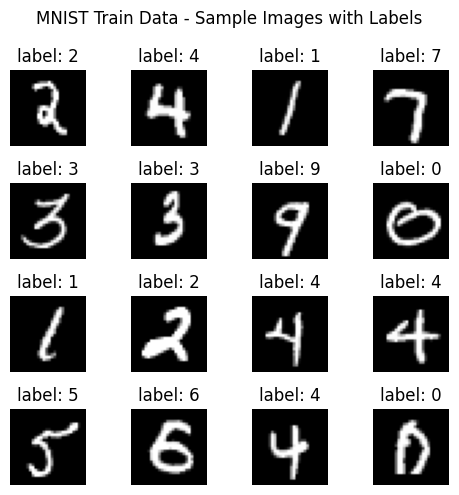

In [6]:
vu.visualize_sample_images_with_labels(x_train, y_train, 'MNIST Train Data')

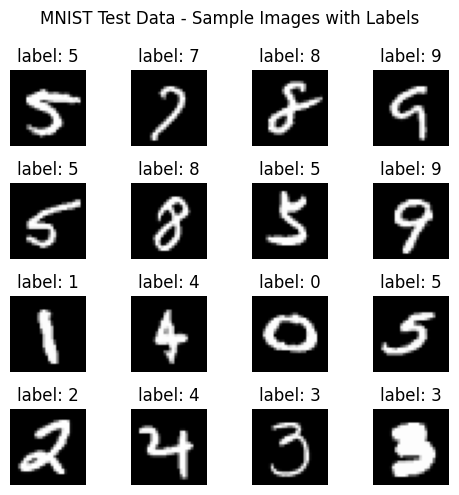

In [7]:
vu.visualize_sample_images_with_labels(x_test, y_test, 'MNIST Test Data')


## 4. Basic Statistics
- Calculate mean, median, standard deviation of image pixel values.

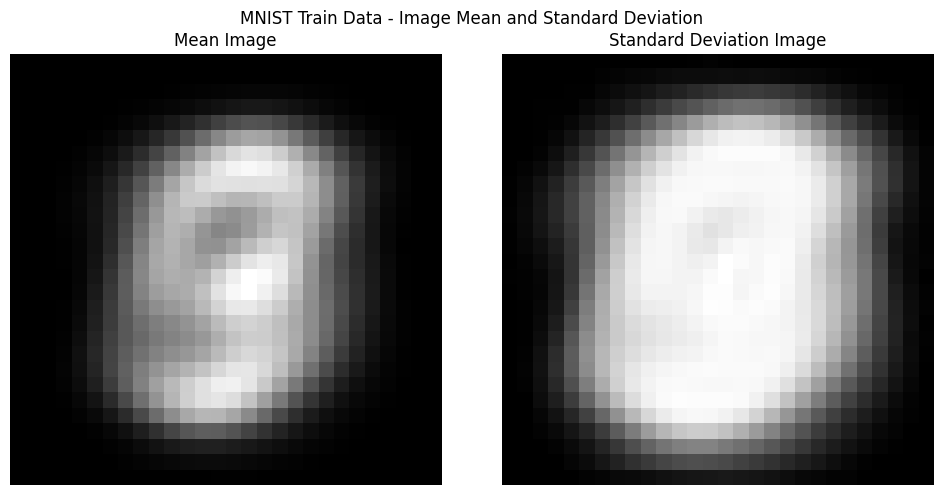

In [12]:
"""
From the visualization of the mean and standard deviation images, we can infer the following:

1. **Mean Image**:
   - The mean image represents the average pixel intensity values across all the images in the training set.
   - This image appears blurry but shows the general shape of the digits. This is because averaging many images of digits will highlight common structures (e.g., the circular shape of '0' or vertical lines in '1') while smoothing out individual variations.
   - The central region is brighter, indicating higher average pixel intensities, which makes sense since the digits are generally centered in the images.

2. **Standard Deviation Image**:
   - The standard deviation image shows the variation or spread of pixel intensity values around the mean for each pixel position.
   - Brighter regions in this image indicate higher variability in those pixel positions. These are areas where the digits have more variation in shape, size, or position.
   - Darker regions have lower variability, indicating more consistent pixel values across different images. These are often the background regions or parts of the image that don't change much between different samples.

Overall, these images provide a good overview of the dataset's characteristics:
- The mean image gives an idea of the average appearance of the digits.
- The standard deviation image highlights which parts of the image have more or less variability, giving insights into the consistency of the digit shapes and their positioning in the images.

This information can be useful for understanding the dataset and for making decisions about preprocessing steps, such as normalization and data augmentation, which might be necessary for improving model performance.
"""

vu.visualize_image_mean_and_std(x_train, 'MNIST Train Data')

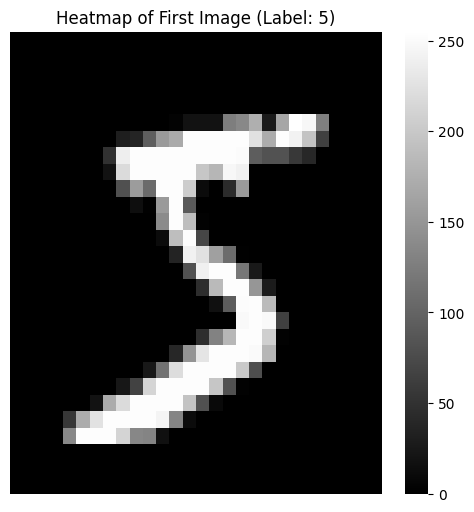

In [11]:


"""
The heatmap visualization of the first image in the MNIST dataset provides several insights:

1. **Pixel Intensity Representation**:
   - The heatmap shows the intensity of each pixel in the image, where the values range from 0 (black) to 255 (white). This range is typical for grayscale images.
   - In this specific image, which is labeled as a '5', we can see that the shape of the digit is clearly visible. The white pixels represent the parts of the image where the digit is present, while the black pixels represent the background.

2. **Digit Structure**:
   - The heatmap allows us to see the structure and stroke of the digit '5'. The brightness of each pixel indicates its intensity, showing how the digit is formed with varying thickness and curves.

3. **Detailed Analysis**:
   - The color bar on the right side of the heatmap provides a reference for the pixel intensity values. This can be useful for understanding the variation in intensity within the digit itself.
   - The heatmap can highlight any anomalies or noise present in the digit. For instance, if there are unexpected bright spots in the background or inconsistencies in the digit’s stroke, they will be visible in the heatmap.

4. **Data Characteristics**:
   - This visualization helps in understanding the quality and characteristics of the data. It shows that the digit is well-centered and clearly distinguishable, which is a common feature of the MNIST dataset.
   - By examining multiple heatmaps, you can get a sense of the variability in how different digits are written, which can inform preprocessing steps or augmentations needed for your model.

In summary, the heatmap provides a detailed view of the pixel intensities of the first image, allowing for a closer examination of the digit's structure and any potential issues with the data. This kind of visualization is useful for gaining a deeper understanding of individual samples in your dataset.
"""
vu.visualize_heatmap_of_first_image(x_train, y_train, 'MNIST Train Data')


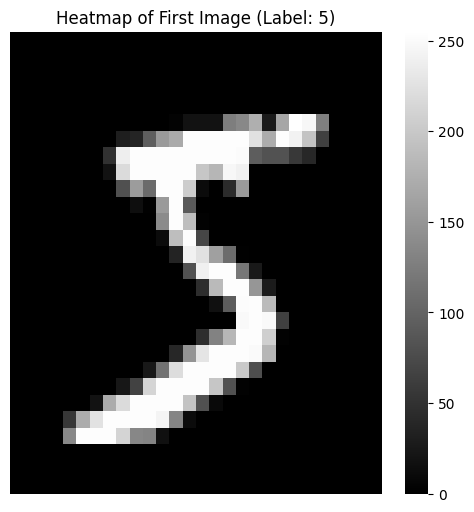


## 3. Class Distribution
- Plot the distribution of classes in the dataset.

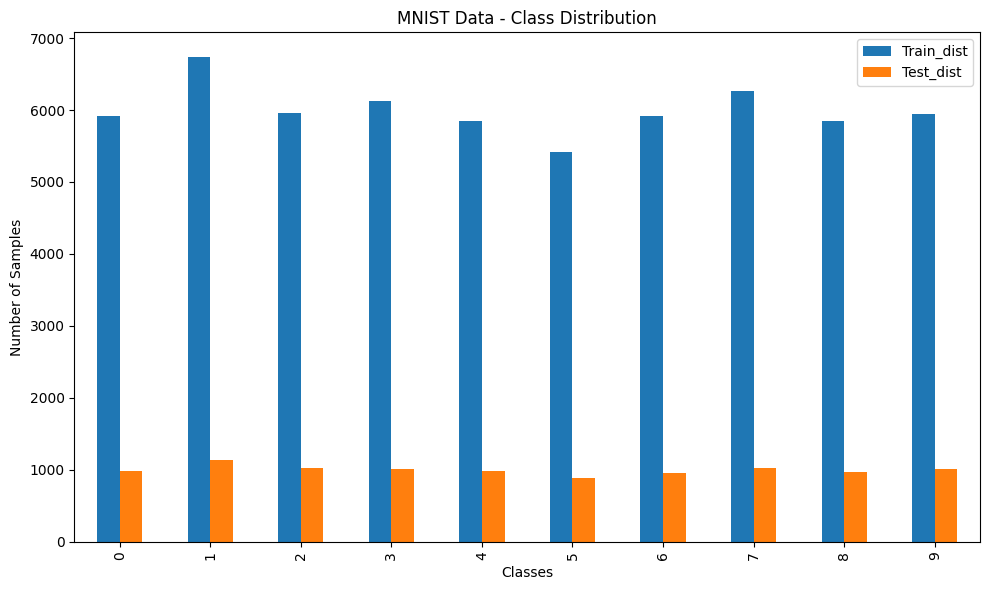

In [13]:
vu.visualize_class_distribution(y_train, y_test, 'MNIST Data')



## 5. Check for Missing or Corrupt Data
- Identify any missing labels or corrupt images.

In [14]:
missing_train = du.check_missing_data(x_train, y_train)
missing_test = du.check_missing_data(x_test, y_test)
print(f'Missing train data: {missing_train}')
print(f'Missing test data: {missing_test}')

Missing train data: 0
Missing test data: 0



## 6. Data Preprocessing
- Normalize and resize images.
- Display some images before and after preprocessing.

In [3]:
x_train, y_train = du.preprocess_mnist(x_train, y_train)

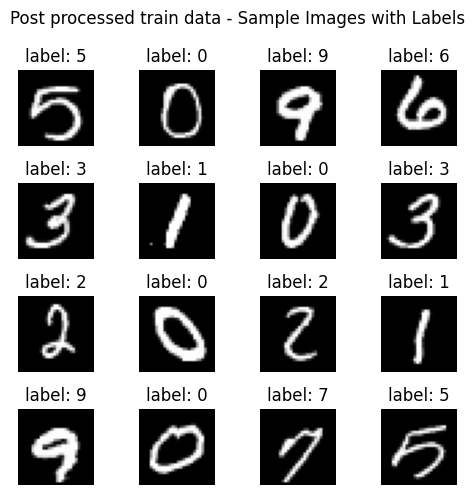

In [15]:
vu.visualize_sample_images_with_labels(x_train, y_train, 'Post processed train data')

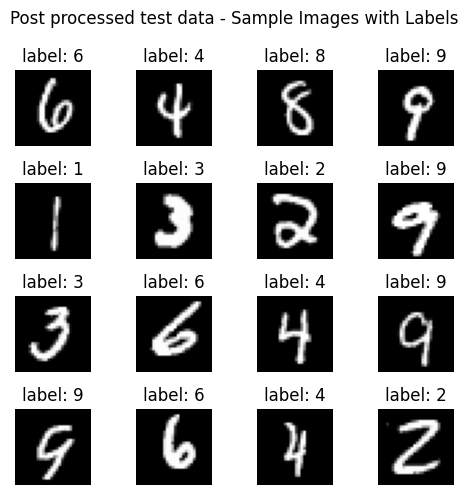

In [16]:
vu.visualize_sample_images_with_labels(x_test, y_test, 'Post processed test data')